In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split, GridSearchCV
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.utils import np_utils
from keras import backend as K
import tensorflow as tf
from tensorflow.keras import layers, models

In [31]:
df_ = pd.read_csv('hmnist_28_28_L.csv')

In [32]:
df.head()

,pixel0000,pixel0001,pixel0002,pixel0003,pixel0004,pixel0005,pixel0006,pixel0007,pixel0008,pixel0009,...,pixel2343,pixel2344,pixel2345,pixel2346,pixel2347,pixel2348,pixel2349,pixel2350,pixel2351,label
0,192,153,193,195,155,192,197,154,185,202,...,173,124,138,183,147,166,185,154,177,2
1,25,14,30,68,48,75,123,93,126,158,...,60,39,55,25,14,28,25,14,27,2
2,192,138,153,200,145,163,201,142,160,206,...,167,129,143,159,124,142,136,104,117,2
3,38,19,30,95,59,72,143,103,119,171,...,44,26,36,25,12,17,25,12,15,2
4,158,113,139,194,144,174,215,162,191,225,...,209,166,185,172,135,149,109,78,92,2


In [33]:
df.shape

(10015, 2353)

In [34]:
df.label.value_counts()

4    6705
6    1113
2    1099
1     514
0     327
5     142
3     115
Name: label, dtype: int64

In [36]:
X = df.drop(columns='label', axis=1).values
y = df['label'].values

X_train, X_test, y_train, y_test = train_test_split(X/255., y, test_size=0.2, random_state=0, stratify=y)

# tensorflow wants a 4D tensor with (n_images, width, height, colour_depth)
print(X.shape)
print(y.shape)

print('X_train shape: ', X_train.shape)
print('X_test shape: ', X_test.shape)
print('y_train shape: ', y_train.shape)
print('y_test shape: ', y_test.shape)

(10015, 2352)
(10015,)
X_train shape:  (8012, 2352)
X_test shape:  (2003, 2352)
y_train shape:  (8012,)
y_test shape:  (2003,)


In [37]:
# one hot encode outputs
y_train_cnn = np_utils.to_categorical(y_train)
y_test_cnn = np_utils.to_categorical(y_test)
num_classes = y_test_cnn.shape[1]

In [38]:
print(y_train_cnn.shape)
print(y_test_cnn.shape)

(8012, 7)
(2003, 7)


# reshape to be [samples][pixels][width][height]
X_train_cnn = X_train
X_test_cnn = X_test

In [45]:
# reshape to be [samples][pixels][width][height]
X_train_cnn = X_train.reshape(X_train.shape[0], 28, 28, 3).astype('float32')
X_test_cnn = X_test.reshape(X_test.shape[0], 28, 28, 3).astype('float32')

In [46]:
# Create the final version of the model
# Create the second version of the model
# pixel width and height of our images

# number of filters in the convnet layer
filters = 64

# conv net parameters
strides = (2, 2)
pool_size = (2,2)
kernel_size = (5, 5)

model_extended_2 = Sequential()
model_extended_2.add(Conv2D(filters=filters, kernel_size=kernel_size, strides=strides, activation='relu', padding='same', input_shape=(28, 28, 3)))
model_extended_2.add(Dropout(0.5))
model_extended_2.add(MaxPooling2D(pool_size=(2,2)))
model_extended_2.add(Conv2D(filters=128, kernel_size=kernel_size, strides=strides, activation='relu', padding='same'))
model_extended_2.add(Dropout(0.5))
model_extended_2.add(MaxPooling2D(pool_size=(2,2)))
model_extended_2.add(Flatten())
model_extended_2.add(Dense(64, activation='relu'))
model_extended_2.add(Dense(num_classes, activation='softmax'))
  
model_extended_2.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 14, 14, 64)        4864      
_________________________________________________________________
dropout_8 (Dropout)          (None, 14, 14, 64)        0         
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 4, 4, 128)         204928    
_________________________________________________________________
dropout_9 (Dropout)          (None, 4, 4, 128)         0         
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 2, 2, 128)         0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 512)              

In [47]:
# Compile and fit the model (10 epochs too)
model_extended_2.compile(loss=tf.keras.losses.CategoricalCrossentropy(from_logits=False),
              optimizer='adam',
              metrics=['accuracy'])

model_extended_2.fit(X_train_cnn, y_train_cnn, epochs=10,  validation_data=(X_test_cnn, y_test_cnn), batch_size=16, verbose=1)

Epoch 1/10
501/501 [==============================] - 9s 15ms/step - loss: 1.0141 - accuracy: 0.6694 - val_loss: 1.1302 - val_accuracy: 0.6680
Epoch 2/10
501/501 [==============================] - 9s 18ms/step - loss: 0.9263 - accuracy: 0.6720 - val_loss: 1.0232 - val_accuracy: 0.6735
Epoch 3/10
501/501 [==============================] - 10s 20ms/step - loss: 0.8940 - accuracy: 0.6815 - val_loss: 1.0427 - val_accuracy: 0.6850
Epoch 4/10
501/501 [==============================] - 10s 19ms/step - loss: 0.8685 - accuracy: 0.6912 - val_loss: 0.9612 - val_accuracy: 0.6985
Epoch 5/10
501/501 [==============================] - 11s 22ms/step - loss: 0.8541 - accuracy: 0.6938 - val_loss: 1.0554 - val_accuracy: 0.6900
Epoch 6/10
501/501 [==============================] - 9s 18ms/step - loss: 0.8342 - accuracy: 0.6952 - val_loss: 0.9389 - val_accuracy: 0.6820
Epoch 7/10
501/501 [==============================] - 7s 15ms/step - loss: 0.8154 - accuracy: 0.6991 - val_loss: 0.9247 - val_accuracy: 0.7

In [48]:
# Final evaluation of the model
scores = model_extended_2.evaluate(X_test_cnn, y_test_cnn, verbose=0)
print('Final CNN accuracy: ', scores[1])

Final CNN accuracy:  0.7014478445053101


In [51]:
y_pred_cnn = model_extended_2.predict(X_test_cnn, batch_size=32, verbose=0).argmax(axis=1)
acc_cnn = accuracy_score(y_test, y_pred_cnn)
print ('CNN accuracy: ',acc_cnn)

CNN accuracy:  0.7014478282576135


In [52]:
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = np.round(cm.astype('float') / cm.sum(axis=1)[:, np.newaxis], 5)
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [35]:
malignous = {4:"mel", 0:"akiec"}
benign = {5:"nv", 3:"df", 2:"bkl", 1:"bcc"}

Confusion matrix, without normalization
[[   5    3   44    0   12    0    1]
 [   1   10   61    0   30    0    1]
 [   0    4  124    0   92    0    0]
 [   0    2   13    0    8    0    0]
 [   1    4   85    0 1245    1    5]
 [   0    3    0    0   21    4    0]
 [   0    1   45    0  160    0   17]]


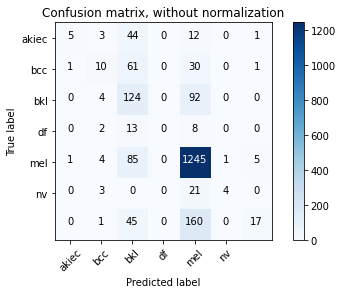

In [54]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred_cnn)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['akiec','bcc','bkl','df','mel', 'nv'],
                      title='Confusion matrix, without normalization')

plt.show()

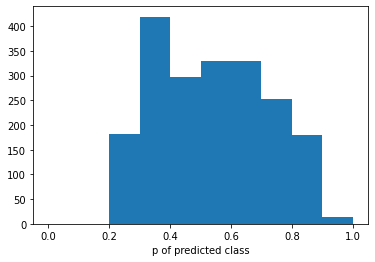

In [56]:
cnn_probab = model_extended_2.predict(X_test_cnn, batch_size=32, verbose=0)

# extract the probability for the label that was predicted:
p_max = np.amax(cnn_probab, axis=1)

plt.hist(p_max, bins=list(np.linspace(0,1,11)));
plt.xlabel('p of predicted class');

In [58]:
np.amin(p_max)

0.2055844

In [59]:
np.mean(p_max)

0.53785974

ValueError: shape mismatch: objects cannot be broadcast to a single shape

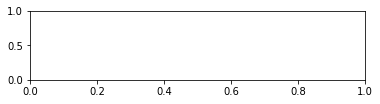

In [63]:
fig, ax = plt.subplots(figsize=(6,15))

for i in list(range(10)):

    # plot probabilities:
    ax = plt.subplot2grid((10, 5), (i, 0), colspan=6);
    plt.bar(np.arange(6), cnn_probab[i], 0.35, align='center');
    plt.xticks(np.arange(6), ['akiec','bcc','bkl','df','mel', 'nv'])
    plt.tick_params(axis='x', bottom='off', top='off')
    plt.ylabel('Probability')
    plt.ylim(0,1)
    plt.subplots_adjust(hspace = 0.5)

    # plot picture:
    ax = plt.subplot2grid((10, 5), (i, 4));
    plt.imshow(X_test[i].reshape((28,28)),cmap='gray_r', interpolation='nearest');
    plt.xlabel(label_dict[y_test[i]]); # get the label from the dict
    plt.xticks([])
    plt.yticks([])

In [ ]:
history = model_extended_2.fit(X_train_cnn, y_train_cnn, epochs=10,  validation_data=(X_test_cnn, y_test_cnn), batch_size=16, verbose=1)

In [64]:
def plot_history(history):
    """ This helper function takes the tensorflow.python.keras.callbacks.History
    that is output from your `fit` method to plot the loss and accuracy of
    the training and validation set.
    """
    fig, axs = plt.subplots(1,2, figsize=(12,6))
    axs[0].plot(history.history['accuracy'], label='training set')
    axs[0].plot(history.history['val_accuracy'], label = 'validation set')
    axs[0].set(xlabel = 'Epoch', ylabel='Accuracy', ylim=[0, 1])

    axs[1].plot(history.history['loss'], label='training set')
    axs[1].plot(history.history['val_loss'], label = 'validation set')
    axs[1].set(xlabel = 'Epoch', ylabel='Loss', ylim=[0, 10])
    
    axs[0].legend(loc='lower right')
    axs[1].legend(loc='lower right')
    
plot_history(history)

NameError: name 'history' is not defined